In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("credit.csv", sep=',')
df

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3
...,...,...,...,...,...,...,...
655,656,51108,99000,10,1,10,0
656,657,60732,84000,10,1,13,2
657,658,53834,145000,8,1,9,1
658,659,80655,172000,10,1,15,0


In [3]:
df.rename(columns={"Sl_No":"n° linha"}, inplace=True)
df.rename(columns={"Customer Key":"Chave do Cliente"}, inplace=True)
df.rename(columns={"Avg_Credit_Limit":"Limite de Crédito Médio"}, inplace=True)
df.rename(columns={"Total_Credit_Cards":"Total de Cartões Credito"}, inplace=True)
df.rename(columns={"Total_visits_bank":"Número Total de Visitas ao Banco"}, inplace=True)
df.rename(columns={"Total_visits_online":"Total de visitas online"}, inplace=True)
df.rename(columns={"Total_calls_made":"Total de chamadas realizadas"}, inplace=True)
df.head()

,n° linha,Chave do Cliente,Limite de Crédito Médio,Total de Cartões Credito,Número Total de Visitas ao Banco,Total de visitas online,Total de chamadas realizadas
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column                            Non-Null Count  Dtype
---  ------                            --------------  -----
 0   n° linha                          660 non-null    int64
 1   Chave do Cliente                  660 non-null    int64
 2   Limite de Crédito Médio           660 non-null    int64
 3   Total de Cartões Credito          660 non-null    int64
 4   Número Total de Visitas ao Banco  660 non-null    int64
 5   Total de visitas online           660 non-null    int64
 6   Total de chamadas realizadas      660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [53]:
df.describe().style.background_gradient(cmap='Oranges')

,n° linha,Chave do Cliente,Limite de Crédito Médio,Total de Cartões Credito,Número Total de Visitas ao Banco,Total de visitas online,Total de chamadas realizadas,Cluster,PCA1,PCA2,Cluster_Birch,Cluster_OPTICS
count,610.000000,610.000000,610.000000,610.000000,610.000000,610.000000,610.000000,610.000000,610.000000,610.000000,610.000000,610.000000
mean,308.508197,54983.340984,25914.754098,4.383607,2.552459,1.919672,3.775410,-1.000000,0.000000,0.000000,0.906557,0.000000
std,176.296467,25572.465275,20868.167287,1.878159,1.601939,1.571014,2.869416,0.000000,1.976186,1.017432,0.795795,0.000000
min,1.000000,11265.000000,3000.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-4.132888,-2.316248,0.000000,0.000000
25%,156.250000,33840.250000,10000.000000,3.000000,1.000000,1.000000,1.000000,-1.000000,-2.159953,-0.799920,0.000000,0.000000
50%,308.500000,53874.500000,17000.000000,4.000000,2.000000,2.000000,3.000000,-1.000000,0.722208,0.009756,1.000000,0.000000
75%,460.750000,76661.500000,39000.000000,6.000000,4.000000,3.000000,6.000000,-1.000000,1.640575,0.790205,2.000000,0.000000
max,626.000000,99596.000000,100000.000000,8.000000,5.000000,6.000000,10.000000,-1.000000,3.700482,2.106132,2.000000,0.000000


In [6]:
df.isna().sum()

n° linha                            0
Chave do Cliente                    0
Limite de Crédito Médio             0
Total de Cartões Credito            0
Número Total de Visitas ao Banco    0
Total de visitas online             0
Total de chamadas realizadas        0
dtype: int64

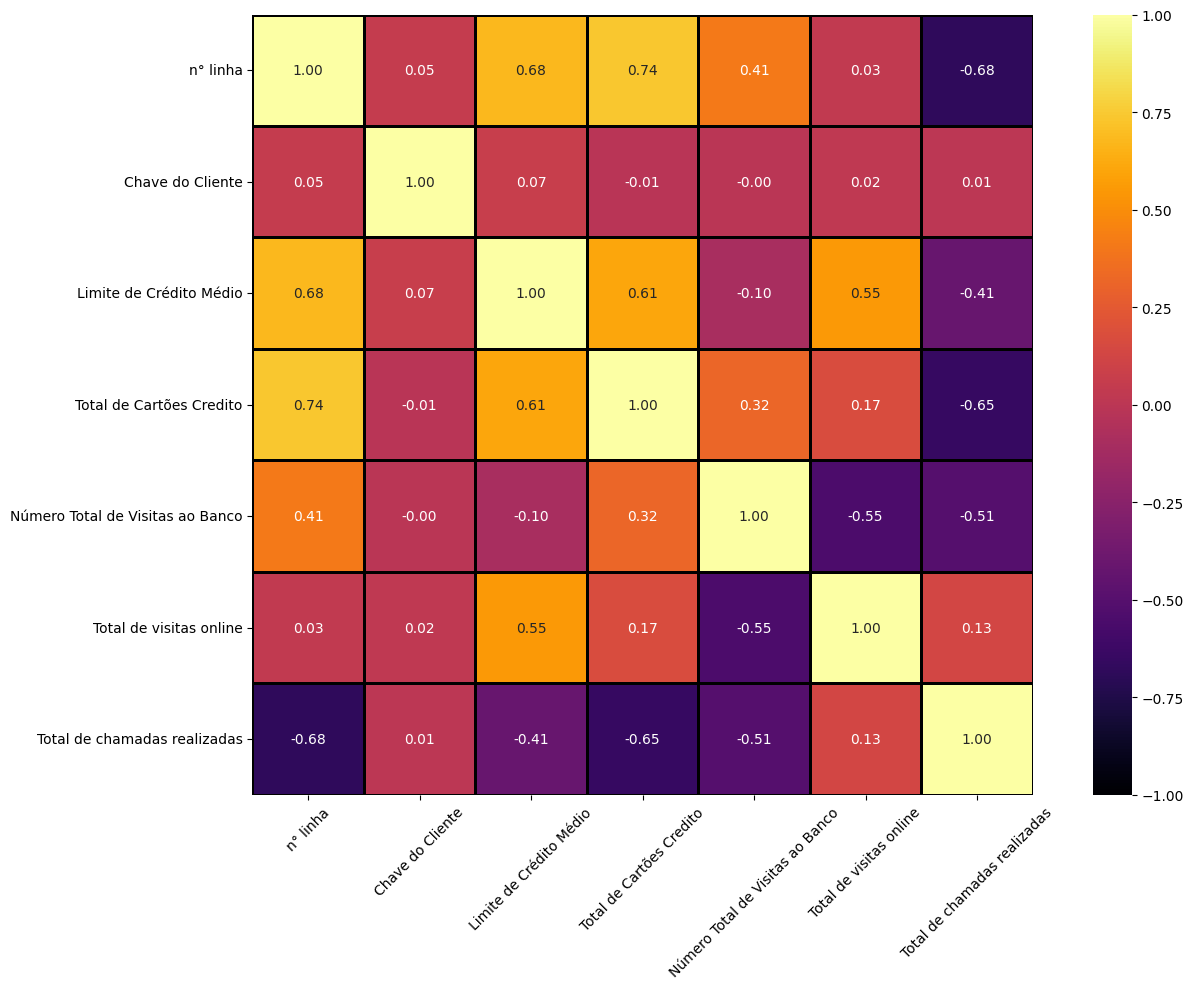

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
f, ax = plt.subplots(figsize=(14, 10))
sns.heatmap(corr, vmax=1,vmin=-1,center=0, linewidths=0.8, linecolor='black',cmap='inferno',annot=True,square=True ,fmt=".2f", annot_kws={'size':10})
plt.subplots_adjust(left=0.2, right=0.8, top=0.8, bottom=0.2)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

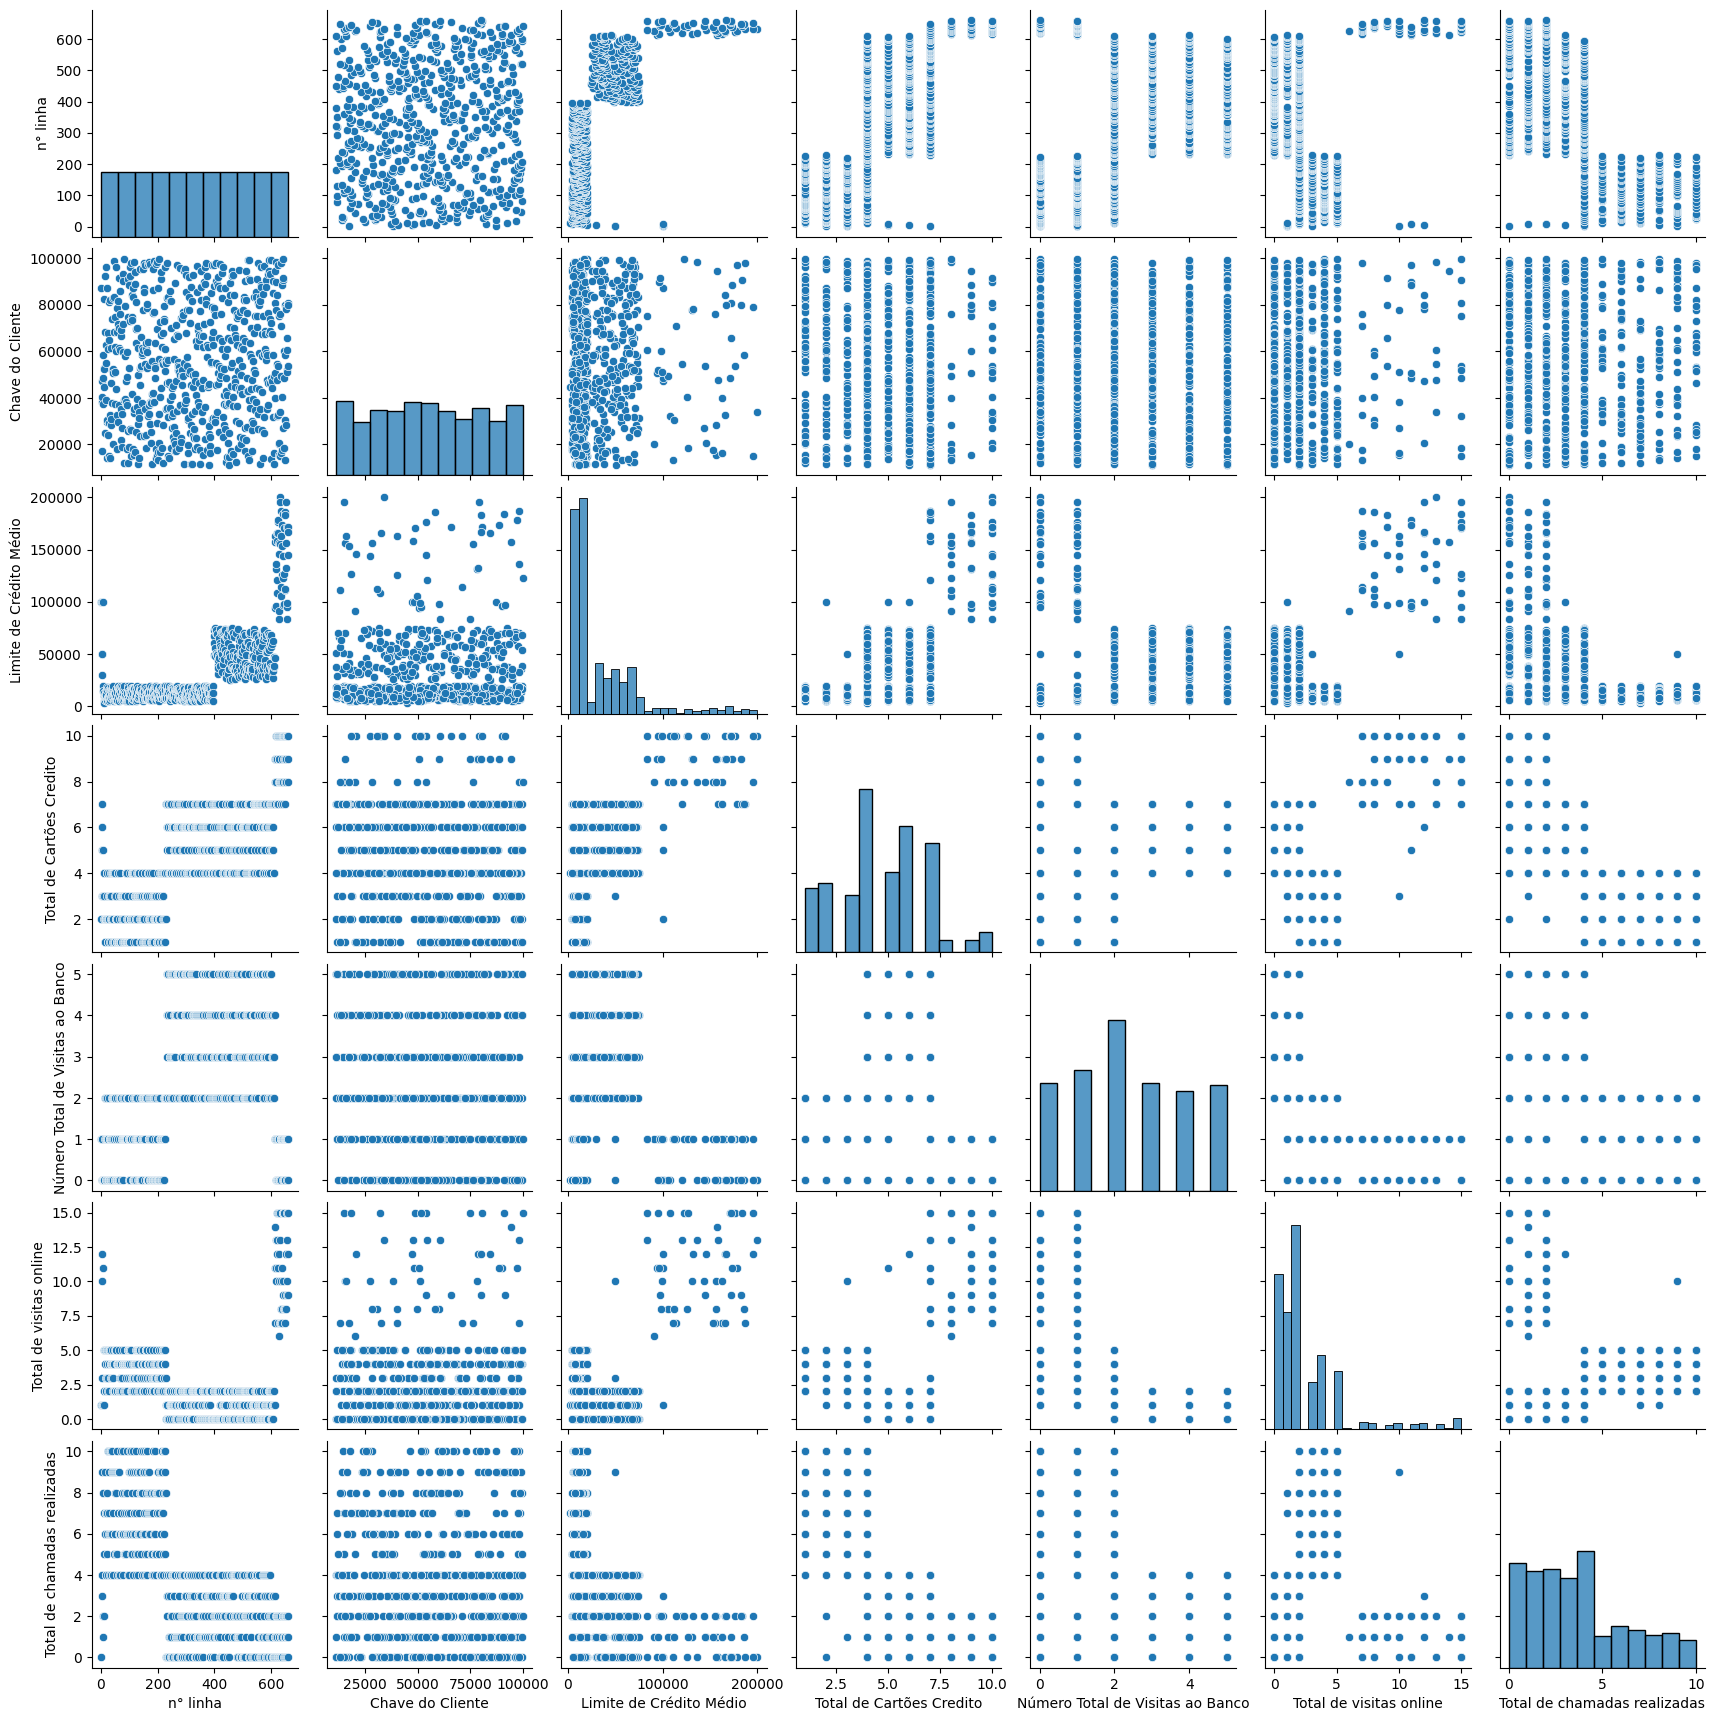

(None,)

In [9]:
sns.pairplot(df)
plt.show(),

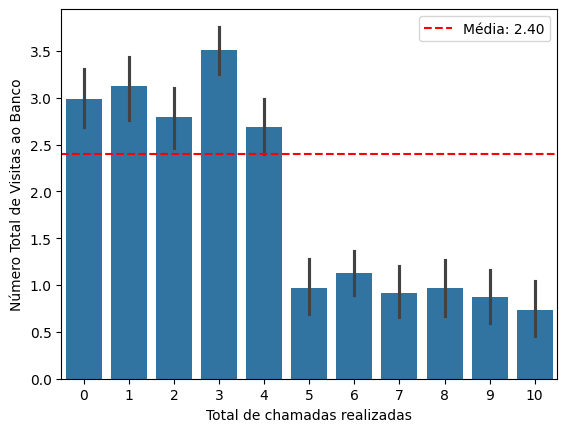

In [10]:
mean_cl = round(df['Número Total de Visitas ao Banco'].mean(), 2)
sns.barplot(x = df["Total de chamadas realizadas"], y= df["Número Total de Visitas ao Banco"])
plt.axhline(y=mean_cl, color='red', linestyle='--', label=f'Média: {mean_cl:.2f}')
plt.legend()
plt.show()

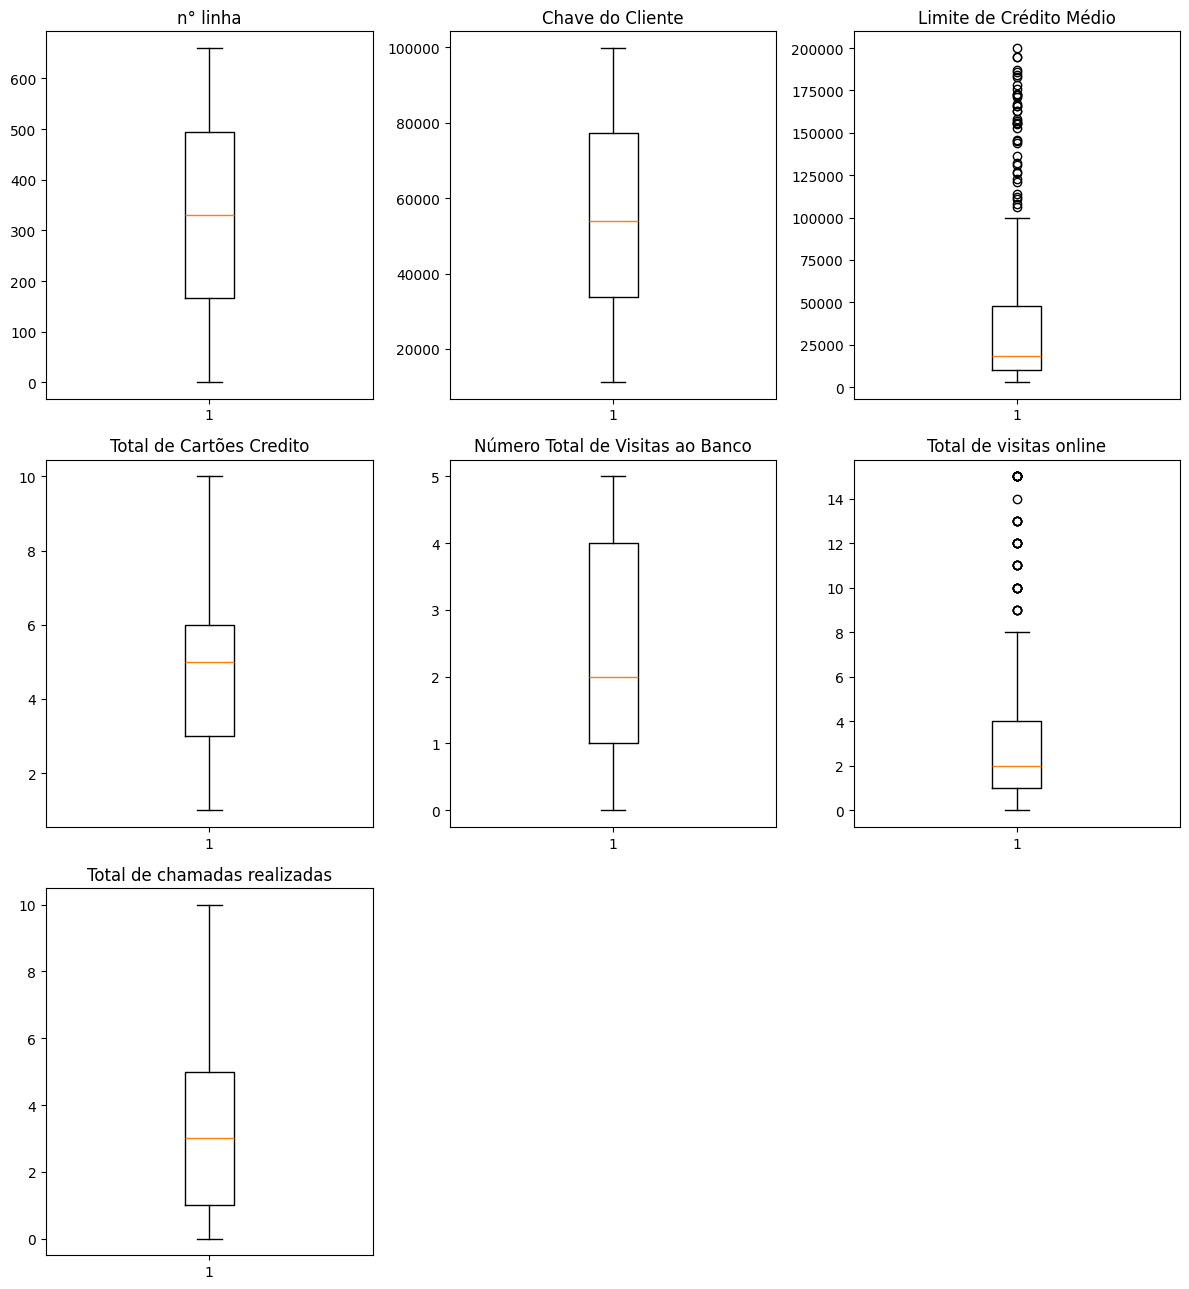

In [11]:
# Outliers
import matplotlib.pyplot as plt
import seaborn as sns

columns = df.columns
fig, axes = plt.subplots(nrows =3, ncols =3, figsize= (12, 13))
axes = axes.flatten()

for i, column in enumerate(columns):
    axes[i].boxplot(df[column])
    axes[i].set_title(column)
    
for j in range(len(columns), len(axes)):
    axes[j].axis('off')
    
plt.tight_layout()
plt.show()


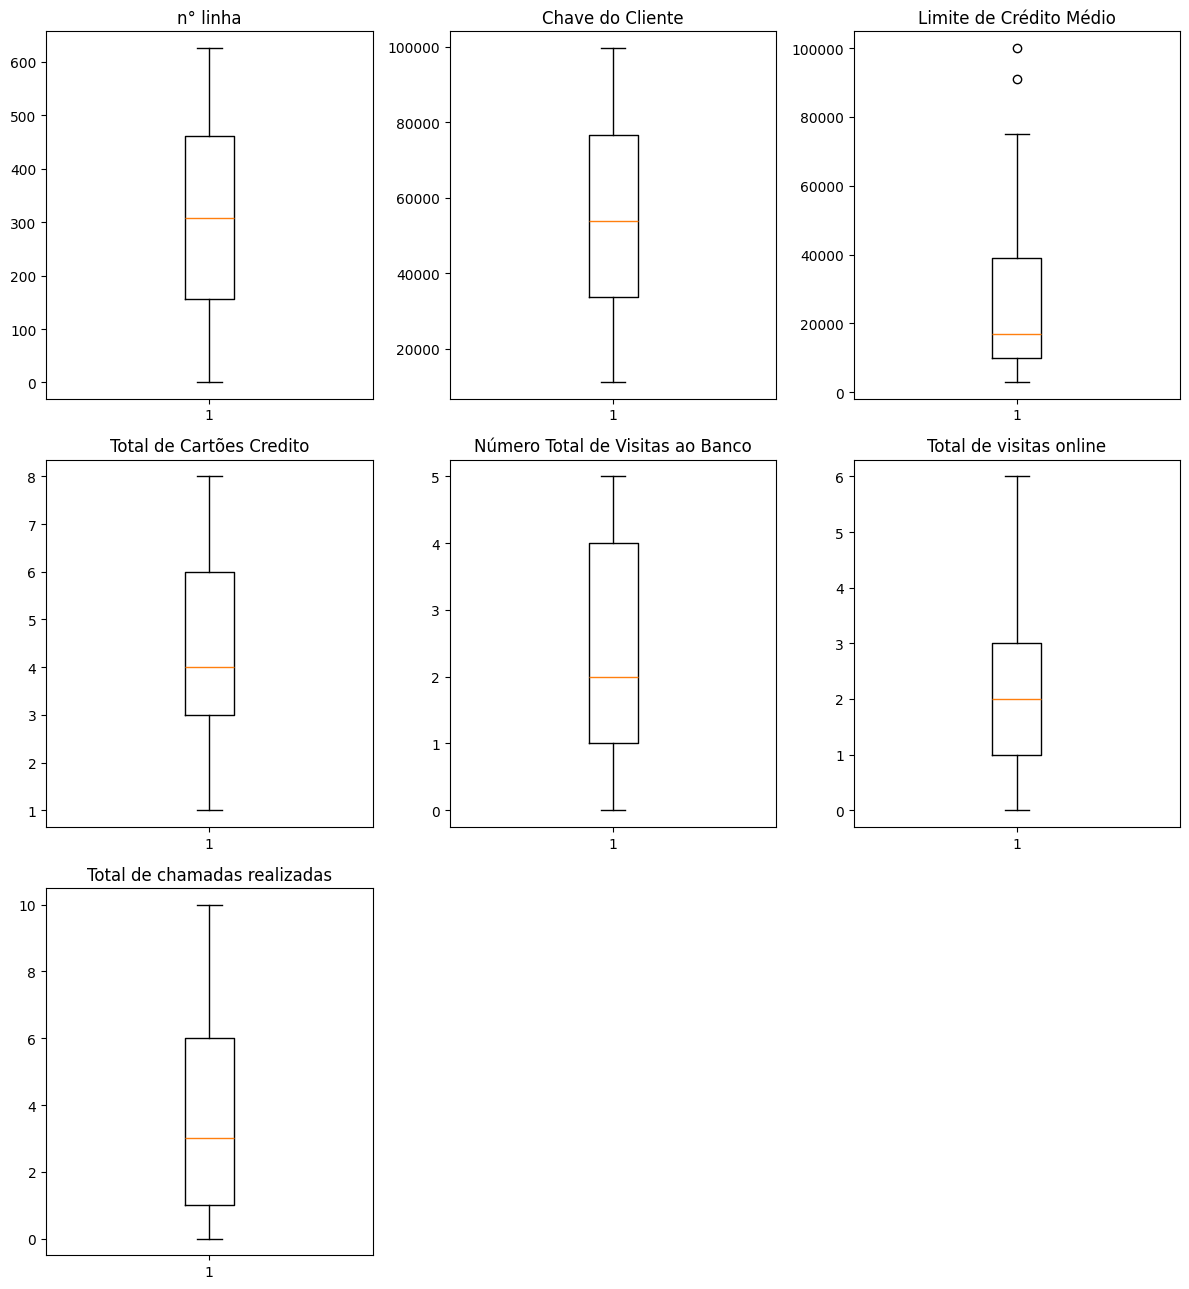

In [12]:
import numpy as np
def drop_outliers(df, field_name):
    iqr = 1.5 * (np.percentile(df[field_name], 75) - np.percentile(df[field_name], 25))
    df.drop(df[df[field_name] > (iqr + np.percentile(df [field_name], 75)) ].index, inplace=True) 
    df.drop(df[df[field_name] < (np.percentile(df [field_name], 25) - iqr)].index, inplace=True)
outliers_cols =['Limite de Crédito Médio', 'Total de visitas online']
    
for col in outliers_cols:
    drop_outliers(df, col)
fig, axes = plt.subplots(nrows =3, ncols =3, figsize= (12, 13))
axes = axes.flatten()

for i, column in enumerate(columns):
    axes[i].boxplot(df[column])
    axes[i].set_title(column)
    
for j in range(len(columns), len(axes)):
    axes[j].axis('off')
    
plt.tight_layout()
plt.show()


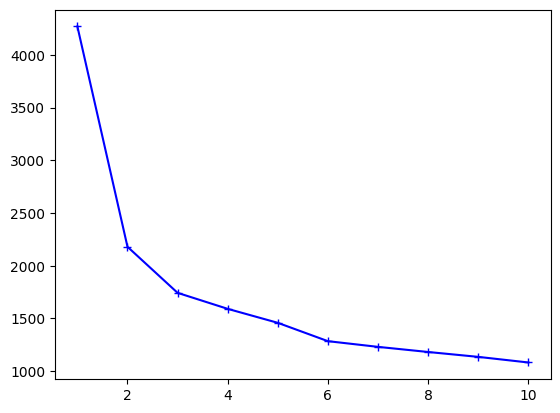

In [13]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
X = df.copy()
scaler = StandardScaler()
X = scaler.fit_transform(X)
X.shape
(660, 5)
clusters = 11
cost = []
for i in range(1,clusters):
 kmeans = KMeans(n_clusters = i, random_state = 42)
 kmeans.fit(X)
 cost.append(kmeans.inertia_)

plt.plot(range(1, 11), cost, "b+-")
plt.show()

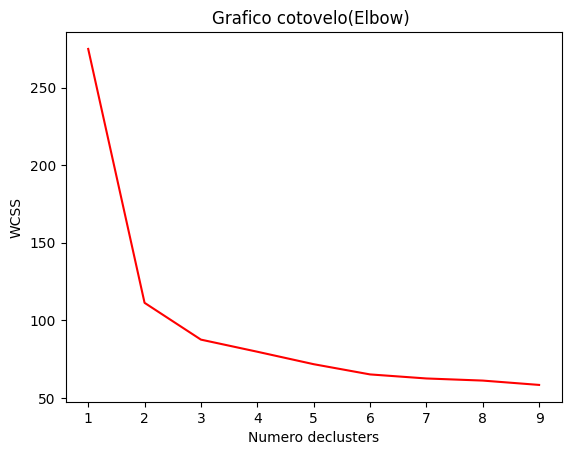

In [14]:
from sklearn.cluster import KMeans
X = df.drop(['n° linha', 'Chave do Cliente'], axis=1).reset_index()
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
wcss=[]

for i in range(1,10):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 10), wcss, color = 'red')
plt.title('Grafico cotovelo(Elbow) ')
plt.xlabel('Numero declusters')
plt.ylabel('WCSS')
plt.show()

# MACHINE LEARNING /PCA

- k-means

In [36]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
df_limpo= df.drop(['n° linha', 'Chave do Cliente'], axis=1).reset_index()
scaler = StandardScaler()
data_normalized = scaler.fit_transform(df_limpo)
kmeans= KMeans(n_clusters=3, random_state=42)
df_limpo['Cluster'] = kmeans.fit_predict(data_normalized)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_normalized)


df_limpo['PCA1'] = principal_components[:, 0]
df_limpo['PCA2'] = principal_components[:, 1]



- Plotar os clusters

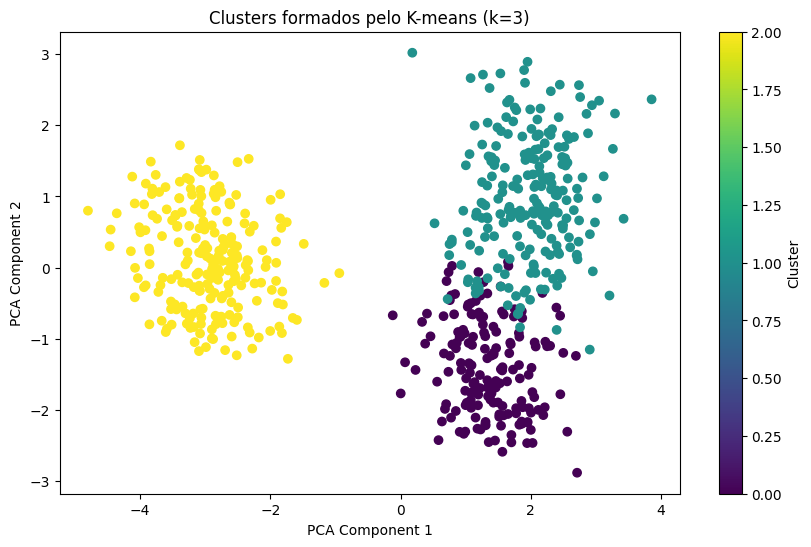

In [37]:
plt.figure(figsize=(10, 6))
plt.scatter(df_limpo['PCA1'], df_limpo['PCA2'], c=df_limpo['Cluster'], cmap='viridis', marker='o')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Clusters formados pelo K-means (k=3)')
plt.colorbar(label='Cluster')
plt.show()

- DBSCAN

In [41]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Aplicando DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
df_limpo['Cluster'] = dbscan.fit_predict(data_normalized)

# Reduzindo a dimensionalidade
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_normalized)

# Adicionar as componentes principais ao dataframe
df_limpo['PCA1'] = principal_components[:, 0]
df_limpo['PCA2'] = principal_components[:, 1]




- Plotar os clusters

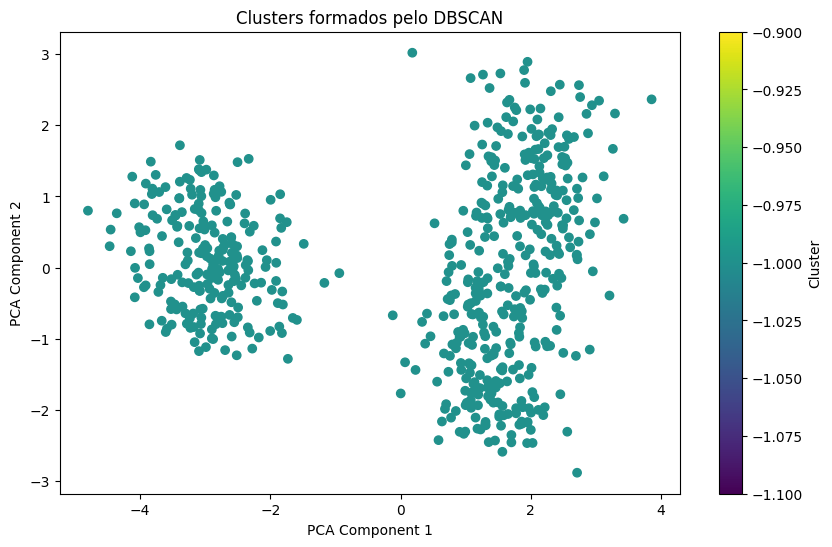

In [43]:
plt.figure(figsize=(10, 6))
plt.scatter(df_limpo['PCA1'], df_limpo['PCA2'], c=df_limpo['Cluster'], cmap='viridis', marker='o')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Clusters formados pelo DBSCAN')
plt.colorbar(label='Cluster')
plt.show()

- Birch

In [19]:
from sklearn.cluster import Birch
birch = Birch(n_clusters=3)
df_limpo['Cluster_Birch'] = birch.fit_predict(data_normalized)

# Redução de dimensionalidade para 2D usando PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_normalized)

# Adicionar as componentes principais ao dataframe
df_limpo['PCA1'] = principal_components[:, 0]
df_limpo['PCA2'] = principal_components[:, 1]

- plotagem

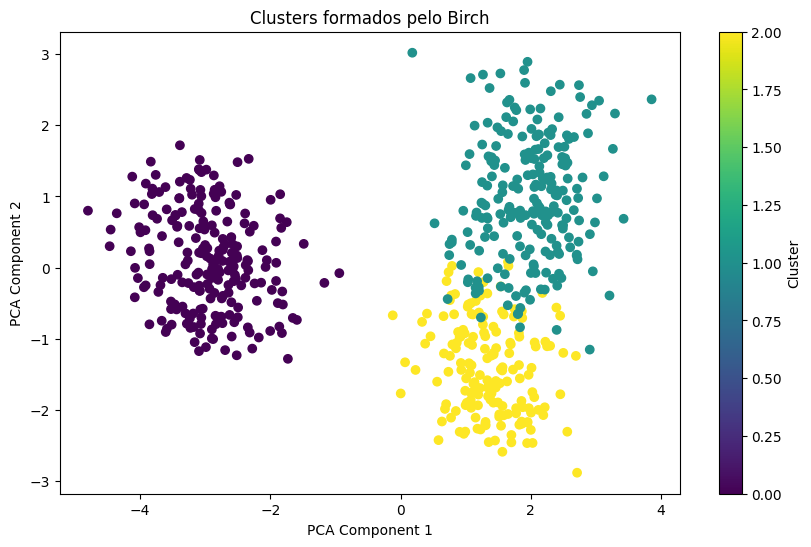

In [44]:

plt.figure(figsize=(10, 6))
plt.scatter(df_limpo['PCA1'], df_limpo['PCA2'], c=df_limpo['Cluster_Birch'], cmap='viridis', marker='o')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Clusters formados pelo Birch')
plt.colorbar(label='Cluster')
plt.show()

- OPTICS.

In [45]:
from sklearn.cluster import OPTICS
optics = OPTICS(min_samples=5, xi=0.05, min_cluster_size=0.1)
df_limpo['Cluster_OPTICS'] = optics.fit_predict(data_normalized)

# Reduzindo a dimensionalidade
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_normalized)

# Adicionar as componentes principais ao dataframe
df_limpo['PCA1'] = principal_components[:, 0]
df_limpo['PCA2'] = principal_components[:, 1]



- Plotar os clusters formados pelo OPTICS

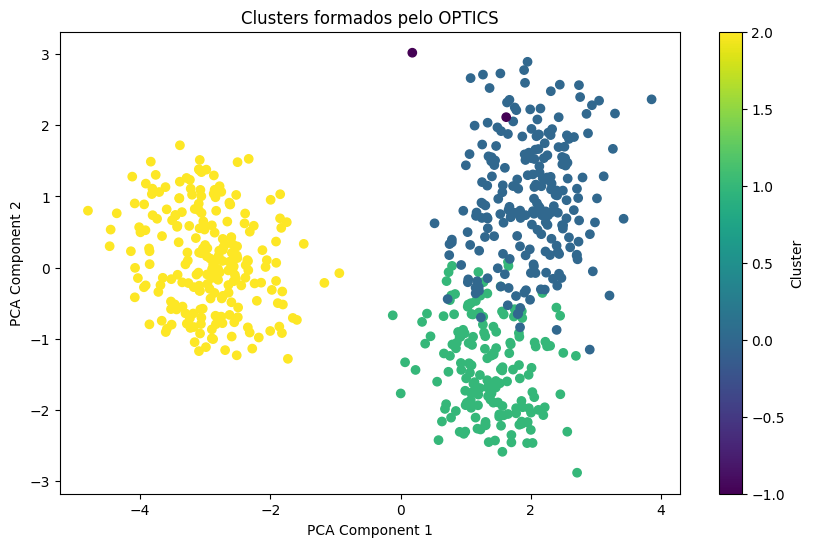

In [46]:

plt.figure(figsize=(10, 6))
plt.scatter(df_limpo['PCA1'], df_limpo['PCA2'], c=df_limpo['Cluster_OPTICS'], cmap='viridis', marker='o')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Clusters formados pelo OPTICS')
plt.colorbar(label='Cluster')
plt.show()

# Calculo métrica

In [47]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score
# Ajustando os modelos aos dados
kmeans.fit(df_limpo)
birch.fit(df_limpo)
optics.fit(df_limpo)

# Predizendo os clusters (não necessário para OPTICS)
labels_kmeans = kmeans.labels_
labels_birch = birch.labels_

# Calculando as métricas
silhouette_kmeans = silhouette_score(df_limpo, labels_kmeans)
silhouette_birch = silhouette_score(df_limpo, labels_birch)
calinski_kmeans = calinski_harabasz_score(df_limpo, labels_kmeans)
calinski_birch = calinski_harabasz_score(df_limpo, labels_birch)
labels_optics = optics.labels_
calinski_optics = calinski_harabasz_score(df_limpo, labels_optics)

In [48]:

# Mostrando os resultados
print("KMeans:")
print(f"Coeficiente de Silhueta: {silhouette_kmeans}")
print(f"Índice de Calinski-Harabasz: {calinski_kmeans}")
print()
print("Birch:")
print(f"Coeficiente de Silhueta: {silhouette_birch}")
print(f"Índice de Calinski-Harabasz: {calinski_birch}")
print()
print("OPTICS:")
print(f"Índice de Calinski-Harabasz: {calinski_optics}")

KMeans:
Coeficiente de Silhueta: 0.7124362339741607
Índice de Calinski-Harabasz: 3471.7867816110547

Birch:
Coeficiente de Silhueta: 0.7155862040497032
Índice de Calinski-Harabasz: 3472.092053803215

OPTICS:
Índice de Calinski-Harabasz: 2544.054216640257


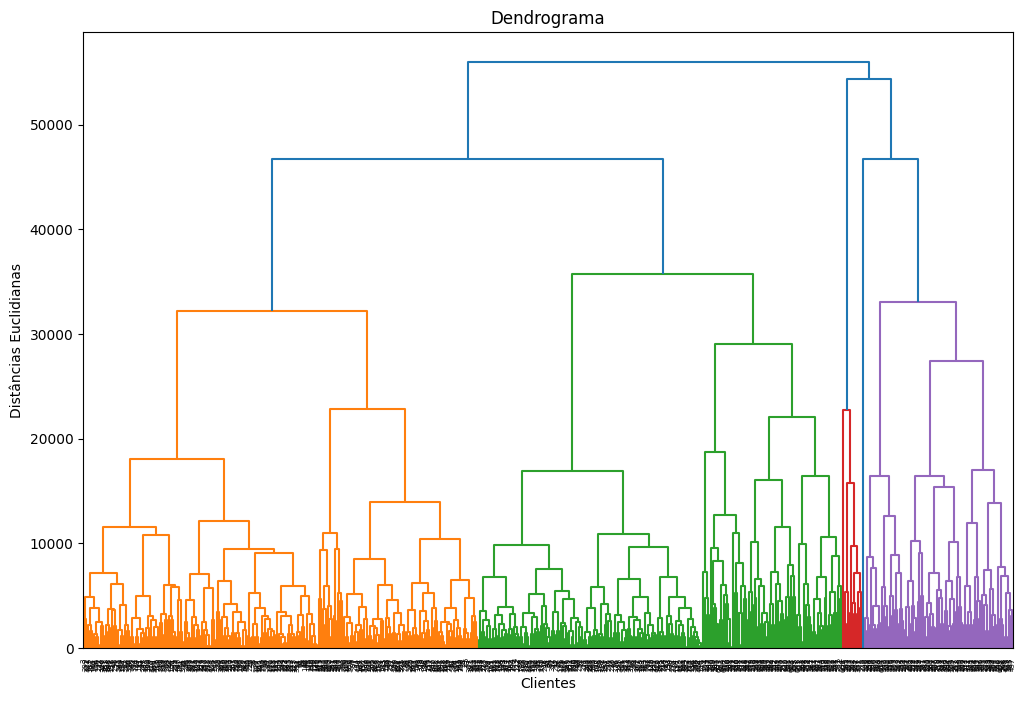

In [25]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(12, 8))
dendrogram = sch.dendrogram(sch.linkage(df, method='average'))
plt.title('Dendrograma')
plt.xlabel('Clientes')
plt.ylabel('Distâncias Euclidianas')
plt.show()

# MACHINE LEARNING SEM PCA

In [49]:
num_clusters = 3  # ajuste conforme necessário

# Criando o modelo K-means
kmeans2 = KMeans(n_clusters=num_clusters)

# Ajustando o modelo aos dados
kmeans2.fit(df_limpo)

# Obter os rótulos dos clusters
labelsx = kmeans2.labels_

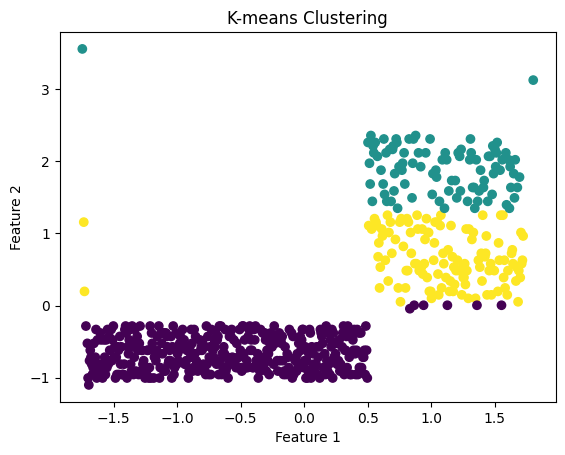

In [50]:
plt.scatter(data_normalized[:, 0], data_normalized[:, 1], c=labelsx, cmap='viridis')
plt.title('K-means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [51]:
kmeans2.fit(df_limpo)
labels_kmeans2 = kmeans2.labels_
silhouette_kmeans2 = silhouette_score(df_limpo, labels_kmeans2)
calinski_kmeans2 = calinski_harabasz_score(df_limpo, labels_kmeans2)
print("KMeans:")
print(f"Coeficiente de Silhueta: {silhouette_kmeans2}")
print(f"Índice de Calinski-Harabasz: {calinski_kmeans2}")

KMeans:
Coeficiente de Silhueta: 0.7124362339741607
Índice de Calinski-Harabasz: 3471.7867816110543


# Importando melhor modelo

In [52]:
import joblib as jb
jb.dump(birch,'kbirch.pkl')

['kbirch.pkl']